#NutriScore

In [58]:
import pandas as pd

In [59]:
data = pd.read_csv('dataset.csv')

In [4]:
data

,product_name,categories,energy-kcal_100g,sugars_100g,saturated-fat_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,fiber_100g,proteins_100g,nutriscore_grade
0,Veganes Protein Vanille,Beverages,384.0,0.30,0.2,0.80,0.000000,4.9,74.1,d
1,Formula 1 healthy meal,"Beverages, Dairies, Canned foods, Meals, Dairy...",380.0,13.00,1.8,1.30,0.000172,20.0,40.0,e
2,Organic Coconut Sparkling Spring Water,"Beverages, Waters",0.0,0.00,0.0,0.00,0.000000,0.0,0.0,b
3,Sparkling water,"Beverages, Waters",0.0,0.00,0.0,0.00,0.000000,0.0,0.0,b
4,"Ryan's, Lemonade","Beverages, Carbonated drinks, Sodas",54.0,13.33,0.0,0.01,15.832500,0.0,0.0,e
...,...,...,...,...,...,...,...,...,...,...
22705,Boost Dilute,"Beverages and beverages preparations, Beverage...",1.0,0.00,0.0,0.05,35.000000,0.0,0.0,b
22706,Kombucha,"Beverages, Fermented foods, Fermented drinks, ...",18.0,44.00,0.0,0.00,0.000000,0.0,0.0,e
22707,Wiskundeboekje,"Beverages, Non-alcoholic beverages, Non-alcoho...",10.0,28.20,6.7,0.20,0.000000,2.1,1.7,e
22708,Juice me up bio,"Beverages and beverages preparations,Beverage ...",0.0,0.00,0.0,0.00,0.000000,0.0,0.0,e


In [60]:
#Clean the Calculated B Data

nutrition_columns = [
    'energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'salt_100g',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'fiber_100g', 'proteins_100g'
]

rows_with_all_zero_nutrition = (data[nutrition_columns] == 0).all(axis=1)

data.loc[rows_with_all_zero_nutrition, 'nutriscore_grade'] = 'b'

In [61]:
#Drop Null Nutrigrade

data = data.dropna(subset=['nutriscore_grade'])

##TFDF

In [10]:
pip install tensorflow-decision-forests

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0
    Uninstalling tf_keras-2.17.0:
    

In [62]:
import tensorflow_decision_forests as tfdf
import pandas as pd
from sklearn.model_selection import train_test_split

In [63]:
# Split into features and target
X = data.drop(columns=['product_name', 'categories', 'nutriscore_grade'])
y = data['nutriscore_grade']


In [64]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine training features and target
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Convert to TensorFlow datasets
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label="nutriscore_grade")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label="nutriscore_grade")

In [65]:
# Train a Gradient Boosted Trees model
model = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.CLASSIFICATION)
model.fit(train_ds)

Use /tmp/tmp2ahuknby as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.354280. Found 18168 examples.
Training model...
Model trained in 0:00:06.910842
Compiling model...
Model compiled.


In [66]:
model.summary()

Model: "gradient_boosted_trees_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	energy-kcal_100g
	fiber_100g
	fruits-vegetables-nuts-estimate-from-ingredients_100g
	proteins_100g
	salt_100g
	saturated-fat_100g
	sugars_100g

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.                                      "energy-kcal_100g"  0.321414 ################
    2.                                           "sugars_100g"  0.290461 ###########
    3.                                             "salt_100g"  0.236766 #####
    4. "fruits-vegetables-nuts-estimate-from-ingredients_100g"  0.213059 #
    5.                                         "p

In [70]:
model.compile(metrics=["accuracy"])
model.evaluate(test_ds, return_dict=True)


5/5 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - accuracy: 0.9386


{'loss': 0.0, 'accuracy': 0.9385733008384705}

In [71]:
model.save("project/model")

## Neural Network

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [29]:
# Encode the target variable
label_encoder = LabelEncoder()
data['nutriscore_grade'] = label_encoder.fit_transform(data['nutriscore_grade'])

In [30]:
# Define features and target
X = data[['energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'salt_100g',
          'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'fiber_100g', 'proteins_100g']]
y = data['nutriscore_grade']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Define the model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer with explicit shape
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax for multi-class classification
])

In [32]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
]

In [34]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6628 - loss: 1.0582 - val_accuracy: 0.7757 - val_loss: 0.6692
Epoch 2/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7660 - loss: 0.6359 - val_accuracy: 0.8420 - val_loss: 0.5509
Epoch 3/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8586 - loss: 0.5101 - val_accuracy: 0.8817 - val_loss: 0.4947
Epoch 4/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8882 - loss: 0.4221 - val_accuracy: 0.8894 - val_loss: 0.4595
Epoch 5/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8895 - loss: 0.4092 - val_accuracy: 0.9018 - val_loss: 0.3944
Epoch 6/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8959 - loss: 0.3861 - val_accuracy: 0.9012 - val_loss: 0.3925
Epoch 7/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9088 - loss: 0.3407 - val_accuracy: 0.9048 - val_loss: 0.3683
Epoch 8/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9088 - loss: 0.3303 - val_accu

In [35]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9260 - loss: 0.2776
Test accuracy: 0.9221


In [36]:
# Save the full model in .h5 format
model.save('final_nutriscore_model.h5')
print("Final model saved as 'final_nutriscore_model.h5'.")

Final model saved as 'final_nutriscore_model.h5'.


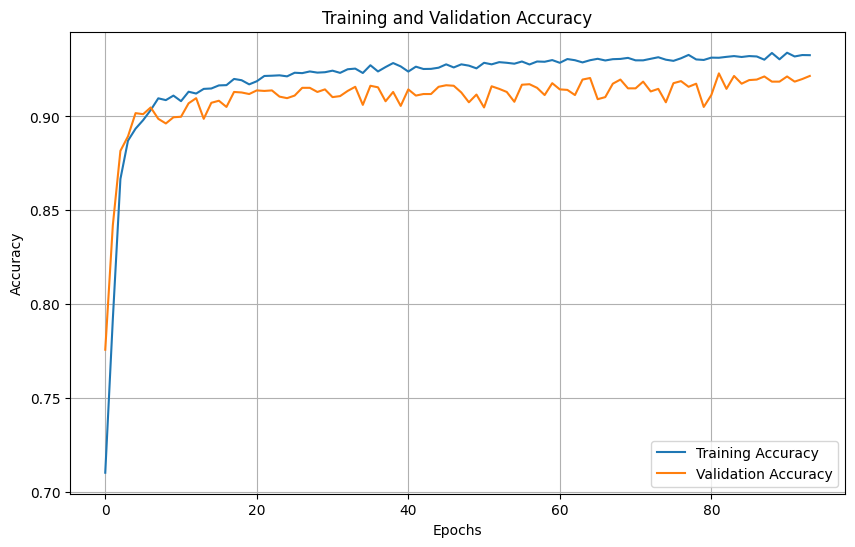

In [37]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#NutriGrade

In [40]:
data_ng = pd.read_csv('dataset.csv')

In [41]:
data_ng

,product_name,categories,energy-kcal_100g,sugars_100g,saturated-fat_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,fiber_100g,proteins_100g,nutriscore_grade
0,Veganes Protein Vanille,Beverages,384.0,0.30,0.2,0.80,0.000000,4.9,74.1,d
1,Formula 1 healthy meal,"Beverages, Dairies, Canned foods, Meals, Dairy...",380.0,13.00,1.8,1.30,0.000172,20.0,40.0,e
2,Organic Coconut Sparkling Spring Water,"Beverages, Waters",0.0,0.00,0.0,0.00,0.000000,0.0,0.0,b
3,Sparkling water,"Beverages, Waters",0.0,0.00,0.0,0.00,0.000000,0.0,0.0,b
4,"Ryan's, Lemonade","Beverages, Carbonated drinks, Sodas",54.0,13.33,0.0,0.01,15.832500,0.0,0.0,e
...,...,...,...,...,...,...,...,...,...,...
22705,Boost Dilute,"Beverages and beverages preparations, Beverage...",1.0,0.00,0.0,0.05,35.000000,0.0,0.0,b
22706,Kombucha,"Beverages, Fermented foods, Fermented drinks, ...",18.0,44.00,0.0,0.00,0.000000,0.0,0.0,e
22707,Wiskundeboekje,"Beverages, Non-alcoholic beverages, Non-alcoho...",10.0,28.20,6.7,0.20,0.000000,2.1,1.7,e
22708,Juice me up bio,"Beverages and beverages preparations,Beverage ...",0.0,0.00,0.0,0.00,0.000000,0.0,0.0,e


In [42]:
nutrition_columns = [
    'energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'salt_100g',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'fiber_100g', 'proteins_100g'
]

# Find rows where all nutrition values are zero
rows_with_all_zero_nutrition = (data_ng[nutrition_columns] == 0).all(axis=1)

# Update the 'nutriscore_grade' for these rows to 'B'
data_ng.loc[rows_with_all_zero_nutrition, 'nutriscore_grade'] = 'b'

data_ng = data_ng.dropna(subset=['nutriscore_grade'])

In [43]:
# List the columns to drop
columns_to_drop = ['categories', 'energy-kcal_100g' , 'salt_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'fiber_100g' , 'proteins_100g' , 'nutriscore_grade' ]

# Drop the columns
data_ng = data_ng.drop(columns=columns_to_drop)


In [44]:
data_ng

,product_name,sugars_100g,saturated-fat_100g
0,Veganes Protein Vanille,0.30,0.2
1,Formula 1 healthy meal,13.00,1.8
2,Organic Coconut Sparkling Spring Water,0.00,0.0
3,Sparkling water,0.00,0.0
4,"Ryan's, Lemonade",13.33,0.0
...,...,...,...
22705,Boost Dilute,0.00,0.0
22706,Kombucha,44.00,0.0
22707,Wiskundeboekje,28.20,6.7
22708,Juice me up bio,0.00,0.0


In [45]:
def calculate_nutri_grade(row):
    sugars = row['sugars_100g']
    saturated_fat = row['saturated-fat_100g']

    if sugars > 10 or saturated_fat > 3:
        return 'D'
    elif sugars > 5 or saturated_fat > 1.5:
        return 'C'
    elif sugars > 1 or saturated_fat > 0.7:
        return 'B'
    else:
        return 'A'

In [46]:
data_ng['nutri_grade'] = data_ng.apply(calculate_nutri_grade, axis=1)


In [47]:
data_ng

,product_name,sugars_100g,saturated-fat_100g,nutri_grade
0,Veganes Protein Vanille,0.30,0.2,A
1,Formula 1 healthy meal,13.00,1.8,D
2,Organic Coconut Sparkling Spring Water,0.00,0.0,A
3,Sparkling water,0.00,0.0,A
4,"Ryan's, Lemonade",13.33,0.0,D
...,...,...,...,...
22705,Boost Dilute,0.00,0.0,A
22706,Kombucha,44.00,0.0,D
22707,Wiskundeboekje,28.20,6.7,D
22708,Juice me up bio,0.00,0.0,A


In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [49]:
# Map Nutri-Grades ('A', 'B', 'C', 'D') to integers
nutri_grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
data_ng['nutri_grade'] = data_ng['nutri_grade'].map(nutri_grade_mapping)

In [50]:
# Define features and target
X = data_ng[['sugars_100g', 'saturated-fat_100g']]
y = data_ng['nutri_grade']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Define the model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer with explicit shape
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(len(nutri_grade_mapping), activation='softmax')  # Output layer with softmax for multi-class classification
])

In [52]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [53]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
]

In [54]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6070 - loss: 1.0267 - val_accuracy: 0.7675 - val_loss: 0.4625
Epoch 2/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8409 - loss: 0.4192 - val_accuracy: 0.9849 - val_loss: 0.1456
Epoch 3/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9600 - loss: 0.1325 - val_accuracy: 0.9579 - val_loss: 0.0916
Epoch 4/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.0857 - val_accuracy: 0.9485 - val_loss: 0.1062
Epoch 5/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.0729 - val_accuracy: 0.9612 - val_loss: 0.0729
Epoch 6/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.0642 - val_accuracy: 0.9722 - val_loss: 0.0548
Epoch 7/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9800 - loss: 0.0554 - val_accuracy: 0.9832 - val_loss: 0.0388
Epoch 8/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9825 - loss: 0.0482 - val_accu

In [55]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9929 - loss: 0.0188
Test accuracy: 0.9921


In [56]:
# Save the full model in .h5 format
model.save('final_nutrigrade_model.h5')
print("Final model saved as 'final_nutrigrade_model.h5'.")


Final model saved as 'final_nutrigrade_model.h5'.


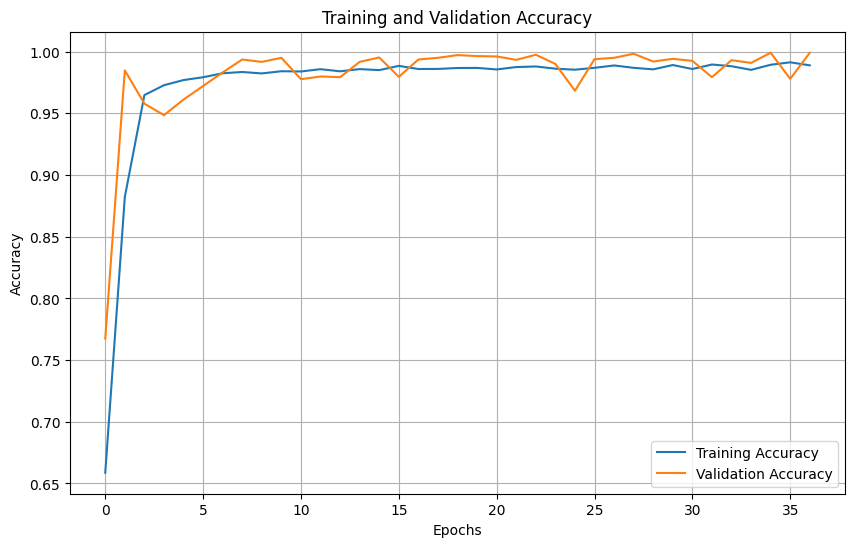

In [57]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()